In [35]:
import numpy as np


class BaseLinearRegression:


    def __init__(self, alpha=0.0, lr=0.01, n_iters=1000):

        self.alpha = alpha
        self.lr = lr
        self.n_iters = n_iters
        self.w = None   
        self.b = None   
    def _penalty(self, w):
        return 0.0

    def _penalty_grad(self, w):
        return 0.0

    def fit(self, X, y):

        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)

        n_samples, n_features = X.shape


        self.w = np.zeros(n_features, dtype=float)
        self.b = 0.0

        for _ in range(self.n_iters):

            y_pred = X.dot(self.w) + self.b
            error = y_pred - y

            dw = (2.0 / n_samples) * X.T.dot(error)
            db = (2.0 / n_samples) * np.sum(error)
            
            dw += self._penalty_grad(self.w)

 
            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    def predict(self, X):
        X = np.array(X, dtype=float)
        return X.dot(self.w) + self.b


class RidgeRegression(BaseLinearRegression):


    def _penalty(self, w):
        return self.alpha * np.sum(w ** 2)

    def _penalty_grad(self, w):

        return 2.0 * self.alpha * w


class LassoRegression(BaseLinearRegression):


    def _penalty(self, w):
        return self.alpha * np.sum(np.abs(w))

    def _penalty_grad(self, w):

        return self.alpha * np.sign(w)


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

In [38]:
data = pd.read_csv("C:/Users/asrya/OneDrive/Desktop/Ed/Python/ML/Boston/boston_house_prices.csv", header= 1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [39]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

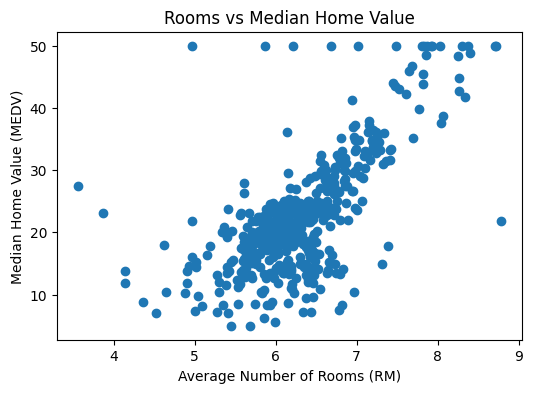

In [40]:
plt.figure(figsize=(6,4))
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Home Value (MEDV)")
plt.title("Rooms vs Median Home Value")
plt.show()


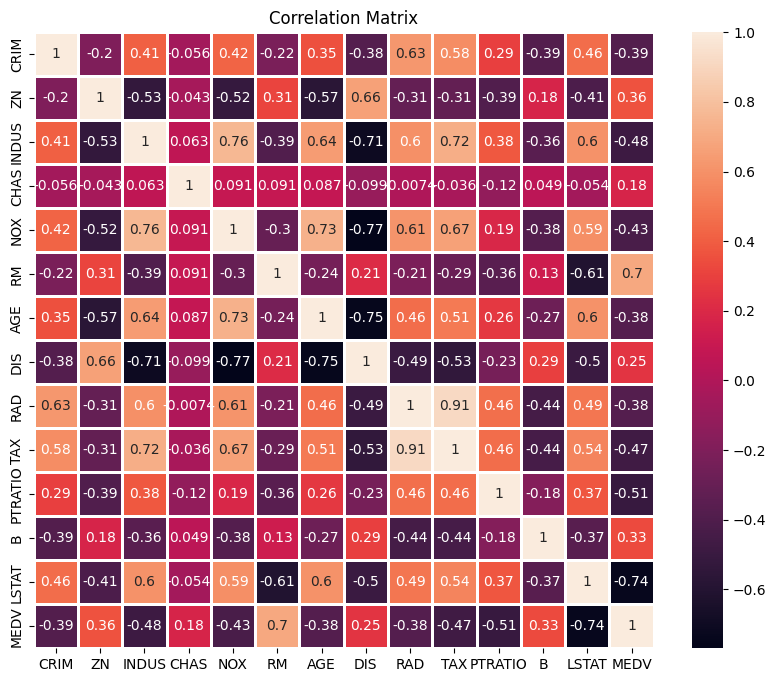

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

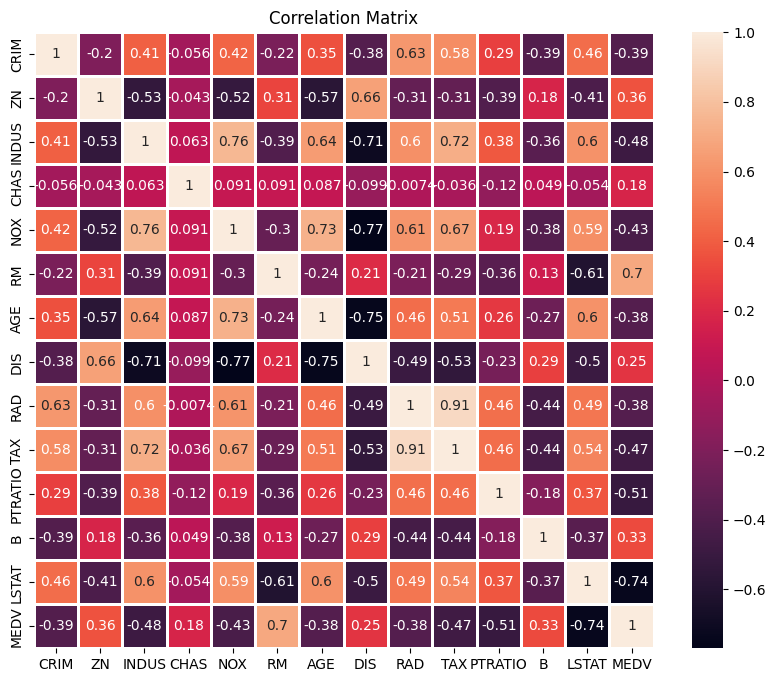

In [41]:
plt.figure(figsize=(10,8))
correlation = data.corr()
sns.heatmap(correlation, annot = True, linewidths=1)
plt.title("Correlation Matrix")
plt.show(correlation)


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

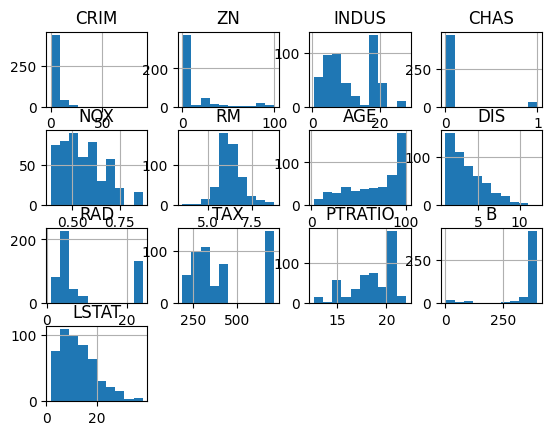

In [26]:
x.hist()

In [27]:
y = data["MEDV"]
x = data.drop(["MEDV"], axis = 1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [29]:
X_mean = x_train.mean(axis=0)
X_std = x_train.std(axis=0)
X_std[X_std == 0] = 1  

In [30]:
X_train_scaled = (x_train - X_mean) / X_std
X_test_scaled = (x_test - X_mean) / X_std

In [31]:
ridge = RidgeRegression(alpha=0.1, lr=1e-3, n_iters=10000)
lasso = LassoRegression(alpha=0.1, lr=1e-3, n_iters=10000)

In [32]:
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

In [33]:
pridge = ridge.predict(X_test_scaled)
plasso = lasso.predict(X_test_scaled)

In [34]:
mse_lasso = mean_squared_error(y_test, plasso)
mse_ridge = mean_squared_error(y_test, pridge)
r2_ridge = r2_score(y_test, pridge)
r2_lasso = r2_score(y_test, plasso)

print(f'mse_lasso = {mse_lasso}  mse_ridge = {mse_ridge}\n'
      f'r2_ridge = {r2_ridge}  r2_lasso = {r2_lasso}')

mse_lasso = 30.680222877370188  mse_ridge = 31.911507257330065
r2_ridge = 0.6094015688409965  r2_lasso = 0.6244725507048332
